### **Ad Performance Analysis and Prediction**

#### **Introduction**

In the current digital marketing work, businesses allocate a lot of budgests to online advertising across many social media platforms to attract potential customers into buying certain products that they are intentionally trying to show through the ads. However, a common and costly challenge is the inefficient targeting of users as ads are often served to individuals with low or no intent to engage, which can lead to wasted effort, poor return on ad spend, and reduce campaign performance. 


Therefore, the business needs a predictive system that can analyze user data and contextual signals to determine the likelihood of an ad being clicked or not, which we also can improve the ad performance later on by deploying ads to specific customer segments so that we can have high return on ad spend, increasing businesses' branding and revenues. 

#### **Project Objectives**
1. **Develop a supervised machine learning model** that can predict the probability of an individual user clicking on a specific advertisement based on historical behavior, demographic features, ad content, and interaction context.

2. **Create meaningful features** from raw data to find the patterns within the users and also apply customer segmentation techniques so that we can enhance the prediction model performance. 

3. **Generate actionable business insights** to support marketing strategy by doing Exploratory Data Analysis to answer important questions so that we can find the most effective customer segment and good signals to deploy the ads to the users. 

#### **Setup**

In [ ]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import missingno as msno

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# Training and Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, roc_auc_score, f1_score, make_scorer

# Hyper-parameter Tuning and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline 

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Saving the model
import pickle

#### **Read dataset**

In [4]:
# Load the dataset from the CSV file 
df = pd.read_csv("ad_ctr.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


**Note**: This dataset provides insights into user behavior and online advertising, spefically focusing on predicting whether a user will click on an online advertisement. It contains user demographic information, browsing habits, and details related to the dispaly of the advertisement. 

#### **Data Understanding**

In [ ]:
# Get to know more about the dataset size and features
print(f"Dataset shape: {df.shape}")
print(f"Dataset features: {df.columns}")
print()
df.info()

Dataset shape: (10000, 10)
Dataset features: Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  

In [ ]:
# Check the categorical and numerical features 
cat_features = df.select_dtypes(include=["object"]).columns.to_list()
print(f"Categorical features in the dataset: {cat_features}")

print()

num_features = df.select_dtypes(exclude=["object"]).columns.to_list()
print(f"Numerical features in the dataset: {num_features}")

Categorical features in the dataset: ['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp']

Numerical features in the dataset: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']


In [14]:
# Check for missing and duplicated rows
num_of_null = df.isnull().sum()
num_of_duplicated = df.duplicated().sum()
print(f"Number of null values in the dataset: {num_of_null}")
print()
print(f"Number of duplicated rows in the dataset: {num_of_duplicated}")

Number of null values in the dataset: Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

Number of duplicated rows in the dataset: 215


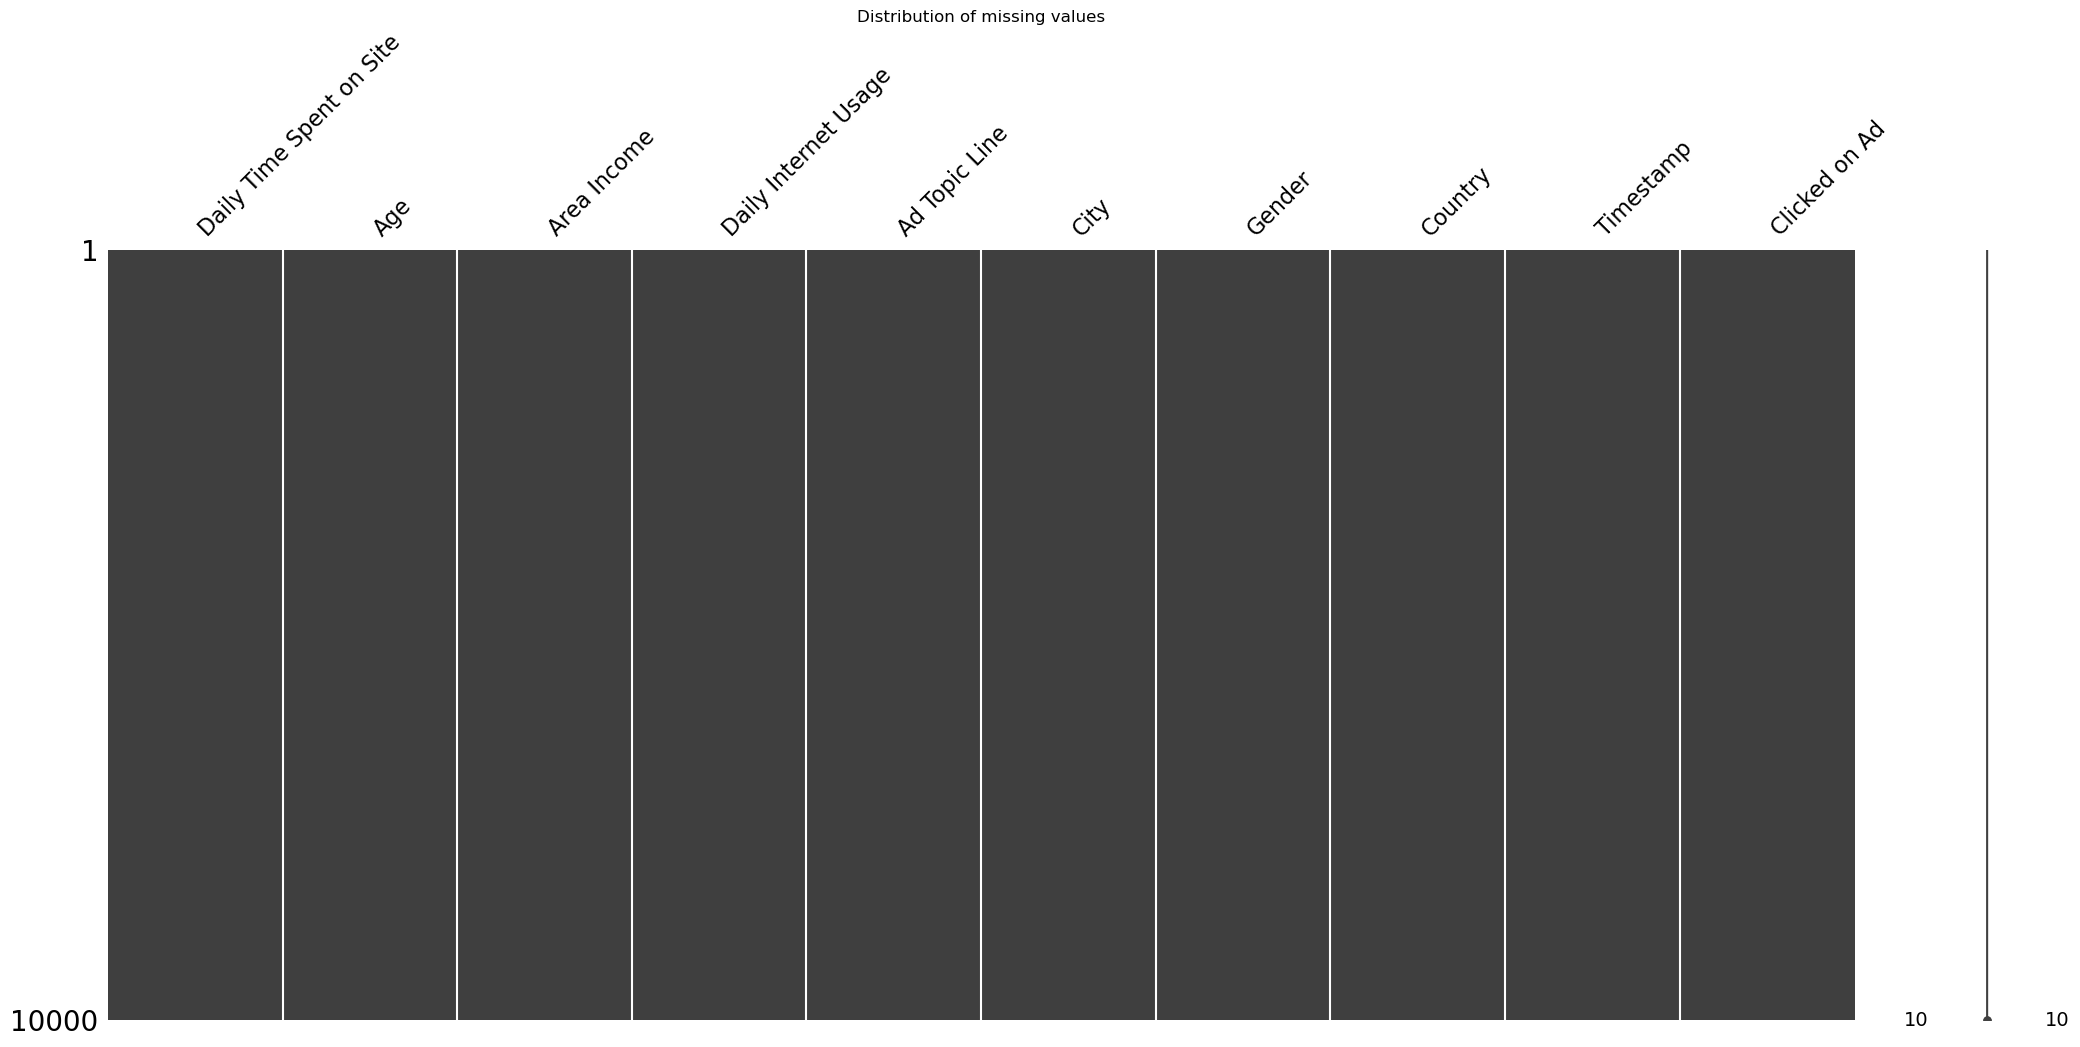

In [26]:
# Use missingno to visualize the distribution of the missing values 
msno.matrix(df)
plt.title("Distribution of missing values")
plt.show()

In [ ]:
# Gain an overview of the descriptive statistics of the dataset
df.describe(include=["float64", "int64"])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


### 

In [31]:
# Check with the categorical features 
df.describe(include=["object"])

,Ad Topic Line,City,Gender,Country,Timestamp
count,10000,10000,10000,10000,10000
unique,559,521,2,207,567
top,Cloned explicit middleware,Hubbardmouth,Female,Australia,2016-03-11 00:05:48
freq,344,336,5376,388,255


In [32]:
# Check the distribution of the target variable 
df["Clicked on Ad"].value_counts()

Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64